In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate

from label_flip_revised.utils import create_dir


In [2]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
print(PATH_ROOT)


c:\Users\lukex\workspace\diva-data-poisoning


In [3]:
path_output = os.path.join(PATH_ROOT, "results_plot")
print(path_output)
create_dir(path_output)


c:\Users\lukex\workspace\diva-data-poisoning\results_plot


Save to: c:\Users\lukex\workspace\diva-data-poisoning\results_plot\fake_acc.pdf


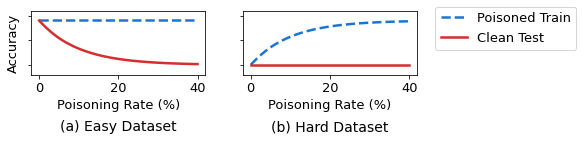

In [25]:
FONTSIZE = 13
FIGSIZE = (6, 2)

x = np.linspace(0, 40, num=10, endpoint=True)

y1 = 100 * np.exp(-0.1 * (x + 8)) + 50
f1 = interpolate.interp1d(x, y1, kind="quadratic")

y2 = -100 * np.exp(-0.1 * (x + 8)) + 95
f2 = interpolate.interp1d(x, y2, kind="quadratic")

xx = np.linspace(0, 40, num=100, endpoint=True)

colors = {
    "red": "#d32f2f",
    "blue": "#1976d2",
}


def draw_lineplot(x_train, y_train, x_test, y_test, title, ax):
    ax.plot(
        x_train,
        y_train,
        label="Poisoned Train",
        linestyle="--",
        linewidth=2.5,
        c=colors["blue"],
    )
    ax.plot(x_test, y_test, label="Clean Test", linewidth=2.5, c=colors["red"])
    ax.set(xlim=[-2, 42], ylim=[40, 105])
    ax.set_yticks([50, 75, 100])
    ax.axes.yaxis.set_ticklabels([])
    ax.set_title(
        title,
        fontsize=FONTSIZE+1,
        y=0, pad=-45, verticalalignment="top"
    )
    ax.set_xlabel("Poisoning Rate (%)")

plt.rcParams["font.size"] = FONTSIZE
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=FIGSIZE)

axs[0].set_ylabel("Accuracy", fontsize=FONTSIZE)
draw_lineplot(xx, 95 * np.ones_like(xx), xx, f1(xx), "(a) Easy Dataset", axs[0])
draw_lineplot(xx, f2(xx), xx, 50 * np.ones_like(xx), "(b) Hard Dataset", axs[1])

(lines, labels) = axs[0].get_legend_handles_labels()
# fig.legend(lines, labels, bbox_to_anchor=(0, 1, 1, 0), loc="lower center", ncol=2)
fig.legend(lines, labels, bbox_to_anchor=(1, 1), loc="upper left")
fig.tight_layout(pad=0.8, w_pad=2.5)

path_fig = os.path.join(
    path_output,
    "fake_acc.pdf",
)
plt.savefig(path_fig, dpi=300, bbox_inches="tight")
print(f"Save to: {path_fig}")


array([432., 144.])